In [36]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import savemat

In [37]:
# start AUTO with runner object
runner = ra.runAUTO()

# run AUTO script, specify parameter Theta using PAR
r1 = ac.run(e='algeq', c='algeq', PAR={2 : 9}, runner=runner)

gfortran -fopenmp -O -c algeq.f90 -o algeq.o
gfortran -fopenmp -O algeq.o -o algeq.exe /auto/lib/*.o
Starting algeq ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)     
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00   0.00000E+00
   1     5        2   1.59033E-01   1.75629E-02   1.93956E-03  -1.74554E-02
   1    10        3   6.56008E-01   7.24857E-02   8.00933E-03  -7.20419E-02
   1    15        4   1.15297E+00   1.27552E-01   1.41109E-02  -1.26769E-01
   1    20        5   1.64990E+00   1.82872E-01   2.02692E-02  -1.81745E-01
   1    25        6   2.14679E+00   2.38563E-01   2.65105E-02  -2.37085E-01
   1    30        7   2.64362E+00   2.94749E-01   3.28629E-02  -2.92911E-01
   1    35        8   3.14038E+00   3.51566E-01   3.93578E-02  -3.49356E-01
   1    40        9   3.63705E+00   4.09162E-01   4.60301E-02  -4.06565E-01
   1    45       10   4.13361E+00   4.67709E-01   5.29202E-02  -4.64705E-01
   1    50       11   4.63004E+00   5.2740

In [38]:
# individual solutions
sols = [ {  "a"     :  np.array( s['U(1)'] ),
            "b"     :  np.array( s['U(2)'] ),
            "theta" : s.PAR(1),
            "P"     : s.PAR(2)
         } for s in r1() ]

# bifurcation diagram
bd = { "P"      : r1[0].coordarray[0,:], 
       "L2norm" : r1[0].coordarray[1,:],
       "a"      : r1[0].coordarray[0,:], 
       "b"      : r1[0].coordarray[1,:],
     }

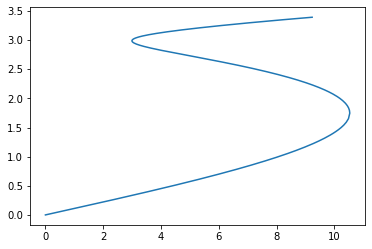

In [39]:
# plot bifurcation diagram
plt.figure()
plt.plot(bd['P'], bd['L2norm'])
plt.show()

# export to MATLAB
mdic = { 'sols' : sols, 'bd' : bd }
savemat('algeq.mat', mdic)